<a href="https://colab.research.google.com/github/prteek/data-science/blob/master/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression
*Art, like mortality, consists in drawing the line somewhere. -G.K. Chesterton*

In [0]:
# This cell is not required to be executed (i.e. ignore any error) if Notebook is run locally or in Binder
# Authorise and mount google drive to access code and data files

project_folder = '/content/drive/My Drive/git_repos/data-science/'

import os

if os.path.isdir('/content'):
    from google.colab import drive
    drive.mount('/content/drive')

    if not(os.path.isdir(project_folder)):
      os.makedirs(project_folder)
      print("new project folder created")

    os.chdir(project_folder)

In [0]:
%%capture
# To supress the output when calling Statistics file
%run ./NaiveBayes.ipynb


In [0]:
def predict(alpha, beta, x_i):
    return beta*x_i + alpha


def error(alpha, beta, x_i, y_i):
    """the error from predicting beta*x_i+ alpha when actual value is y_i"""
    return y_i - predict(alpha, beta, x_i)

def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i)**2
              for x_i, y_i in zip(x,y))

def least_squares_fit(x,y):
    """given training values for x and y, find the least squares values of alpha, beta"""
    beta   = correlation(x, y)*standard_deviation(y)/standard_deviation(x)
    alpha  = mean(y) - beta*mean(x)
    return alpha, beta


alpha:  22.95 beta:  0.904


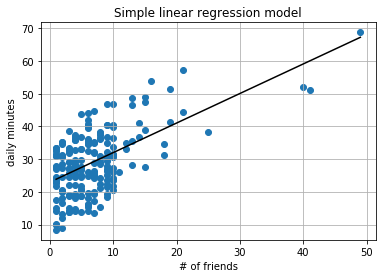

In [0]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print("alpha: ",round(alpha,2), "beta: ",round(beta,3))

plt.scatter(num_friends_good, daily_minutes_good)
plt.plot(num_friends_good, [predict(alpha, beta, x_i) for x_i in num_friends_good], color='black')
plt.title("Simple linear regression model")
plt.xlabel("# of friends")
plt.ylabel("daily minutes")
plt.grid()

In [0]:
def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v**2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals 
    1- the fraction of variation in y not captured by the model"""
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y)/total_sum_of_squares(y))

r_squared(alpha, beta, num_friends_good, daily_minutes_good)

0.3291078377836305

#### Using gradiend descent

In [0]:
def squared_error(x_i, y_i, theta):
    # theta = [alpha, beta]
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i)**2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2*error(alpha, beta, x_i, y_i),  # alpha partial derivative
           -2*error(alpha, beta, x_i, y_i)*x_i] # beta partial derivative

# choose random value to start
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error,
                                  squared_error_gradient,
                                  num_friends_good,
                                  daily_minutes_good,
                                  theta,
                                  0.0001)

print("alpha: ",round(alpha,2), "beta: ",round(beta,3))

alpha:  22.74 beta:  0.922
